<a href="https://colab.research.google.com/github/vm567/CS634_assignments/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz
!tar -xvf /content/lfw.tgz

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.utils import array_to_img,to_categorical,load_img
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions,ResNet50
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model


In [3]:
img_height,img_width=224,224

batch_size=32

data_directory = '/content/lfw'

train_ds =image_dataset_from_directory(
  data_directory,
  validation_split=0.3,
  subset="training",
  seed=123,
  labels='inferred',
  image_size=(img_height, img_width),
  batch_size=batch_size)

validation_ds = image_dataset_from_directory(
  data_directory,
  validation_split=0.3,
  subset="validation",
  seed=123,
  labels='inferred',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13233 files belonging to 5749 classes.
Using 9264 files for training.
Found 13233 files belonging to 5749 classes.
Using 3969 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['AJ_Cook', 'AJ_Lamas', 'Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin', 'Aaron_Tippin', 'Abba_Eban', 'Abbas_Kiarostami', 'Abdel_Aziz_Al-Hakim', 'Abdel_Madi_Shabneh', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Abdul_Majeed_Shobokshi', 'Abdul_Rahman', 'Abdulaziz_Kamilov', 'Abdullah', 'Abdullah_Ahmad_Badawi', 'Abdullah_Gul', 'Abdullah_Nasseef', 'Abdullah_al-Attiyah', 'Abdullatif_Sener', 'Abel_Aguilar', 'Abel_Pacheco', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Abner_Martinez', 'Abraham_Foxman', 'Aby_Har-Even', 'Adam_Ant', 'Adam_Freier', 'Adam_Herbert', 'Adam_Kennedy', 'Adam_Mair', 'Adam_Rich', 'Adam_Sandler', 'Adam_Scott', 'Adel_Al-Jubeir', 'Adelina_Avila', 'Adisai_Bodharamik', 'Adolfo_Aguilar_Zinser', 'Adolfo_Rodriguez_Saa', 'Adoor_Gopalakarishnan', 'Adrian_Annus', 'Adrian_Fernandez', 'Adrian_McPherson', 'Adrian_Murrell', 'Adrian_Nastase', 'Adriana_Lima', 'Adriana_Perez_Navarro', 'Adrianna_Zuzic', 'Adrien_Brody', 'Afton_Smith', 'Agbani_Darego', 'Agn

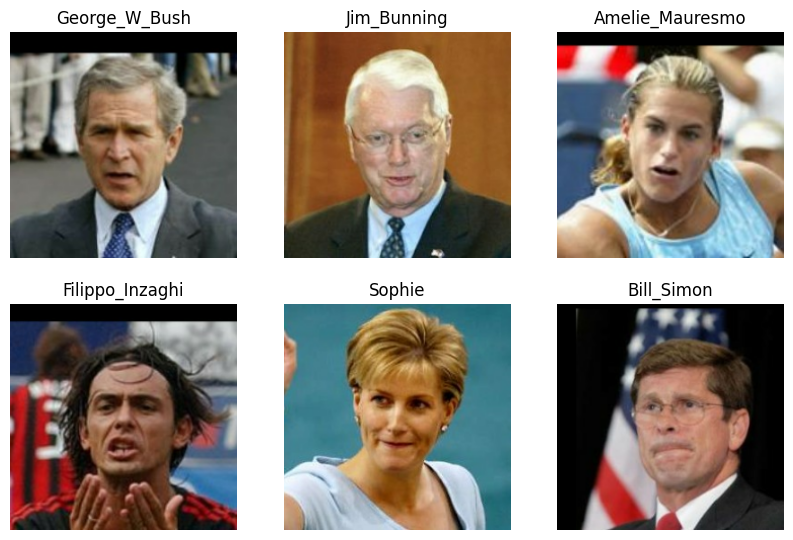

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
from tensorflow.keras.models import Model
# resnet_model = Sequential()

pretrained_model= ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

# resnet_model.add(pretrained_model)
# resnet_model.add(Flatten())
# resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(Dense(1, activation='softmax'))

x = Flatten() (pretrained_model.output)
prediction = Dense(len(class_names), activation = 'softmax')(x)

model = Model(inputs = pretrained_model.input, outputs = prediction)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [7]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split=0.7
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.3
)

In [10]:
IMAGE_SIZE = [224, 224]

batch_size=32

data_directory = '/content/lfw'

training_set = train_datagen.flow_from_directory(
    data_directory,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    subset='training',
    class_mode = 'categorical' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

Found 7506 images belonging to 5749 classes.


In [11]:
test_set = train_datagen.flow_from_directory(
    data_directory,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical',
    subset='validation'
)

Found 5727 images belonging to 5749 classes.


In [12]:
history = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 5
    ,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/5
235/235 [==============================] - 178s 729ms/step - loss: 10.6038 - accuracy: 0.0184 - val_loss: 7.2744 - val_accuracy: 0.0648
Epoch 2/5
235/235 [==============================] - 163s 694ms/step - loss: 9.1192 - accuracy: 0.0204 - val_loss: 7.4761 - val_accuracy: 0.0492
Epoch 3/5
235/235 [==============================] - 161s 688ms/step - loss: 9.1025 - accuracy: 0.0197 - val_loss: 7.5437 - val_accuracy: 0.0611
Epoch 4/5
235/235 [==============================] - 174s 741ms/step - loss: 9.0586 - accuracy: 0.0208 - val_loss: 7.4821 - val_accuracy: 0.0648
Epoch 5/5
235/235 [==============================] - 158s 673ms/step - loss: 9.0123 - accuracy: 0.0199 - val_loss: 7.4436 - val_accuracy: 0.0648


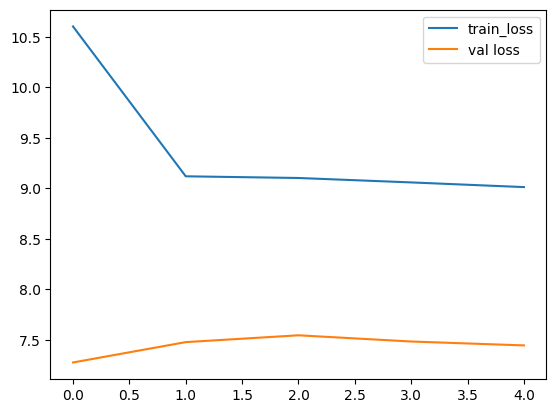

In [13]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss

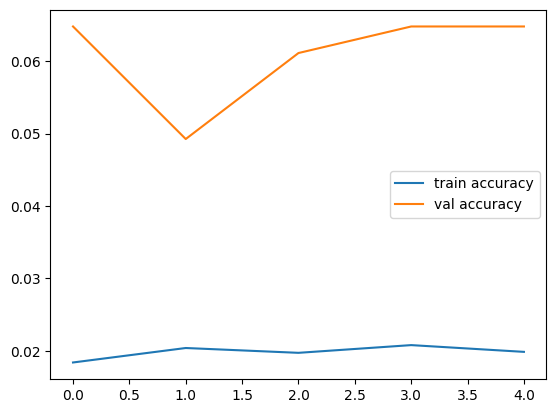

In [14]:
# Plot the Accuracy
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()
# plt.savefig('valAccuracy')

In [15]:
prediction = model.predict(test_set)

179/179 [==============================] - 70s 385ms/step


In [59]:
prediction

0

In [ ]:
prediction = np.argmax(prediction, axis = 1)
prediction

In [17]:

img = load_img('/content/lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg', target_size = IMAGE_SIZE)

In [18]:
from tensorflow.keras.utils import img_to_array
x = img_to_array(img)
x

array([[[238., 243., 239.],
        [240., 245., 241.],
        [242., 247., 241.],
        ...,
        [ 89.,  88.,  57.],
        [ 92.,  91.,  60.],
        [ 92.,  91.,  60.]],

       [[246., 248., 245.],
        [244., 246., 243.],
        [243., 245., 242.],
        ...,
        [ 89.,  88.,  57.],
        [ 91.,  90.,  59.],
        [ 91.,  90.,  59.]],

       [[248., 248., 246.],
        [248., 248., 246.],
        [247., 247., 245.],
        ...,
        [ 89.,  88.,  57.],
        [ 91.,  90.,  59.],
        [ 91.,  90.,  59.]],

       ...,

       [[ 25.,  32.,  76.],
        [ 24.,  31.,  75.],
        [ 19.,  26.,  68.],
        ...,
        [ 48.,  49.,  43.],
        [ 48.,  49.,  44.],
        [ 48.,  49.,  44.]],

       [[ 24.,  31.,  75.],
        [ 21.,  28.,  70.],
        [ 18.,  25.,  67.],
        ...,
        [ 42.,  43.,  38.],
        [ 43.,  44.,  39.],
        [ 43.,  44.,  39.]],

       [[ 26.,  31.,  73.],
        [ 20.,  27.,  69.],
        [ 17.,  

In [25]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10,
                             algorithm='ball_tree',
                             metric='euclidean')
neighbors


NearestNeighbors(algorithm='ball_tree', metric='euclidean', n_neighbors=10)

In [50]:
x.shape

(1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 224,
 224,
 3)

In [48]:
x = x / 255
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
model.predict(img_data)
a = np.argmax(model.predict(img_data), axis = 1)
a

UnimplementedError: ignored

In [20]:
a

array([1871])

In [21]:
output_class=class_names[a[0]]
print("The predicted class is", output_class)

The predicted class is George_W_Bush


In [22]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10,
                             algorithm='ball_tree',
                             metric='euclidean')
neighbors


NearestNeighbors(algorithm='ball_tree', metric='euclidean')

In [23]:
neighbors.fit(model.predict(img_data))
_, indices = neighbors.kneighbors(model.predict(img_data))
indices

1/1 [==============================] - 0s 32ms/step


ValueError: ignored